# AIGS1006 - Deep Learning Assignment 2

Question 1 : Use the backpropagation algorithm to compute the partial derivative ∂L/∂w1 .

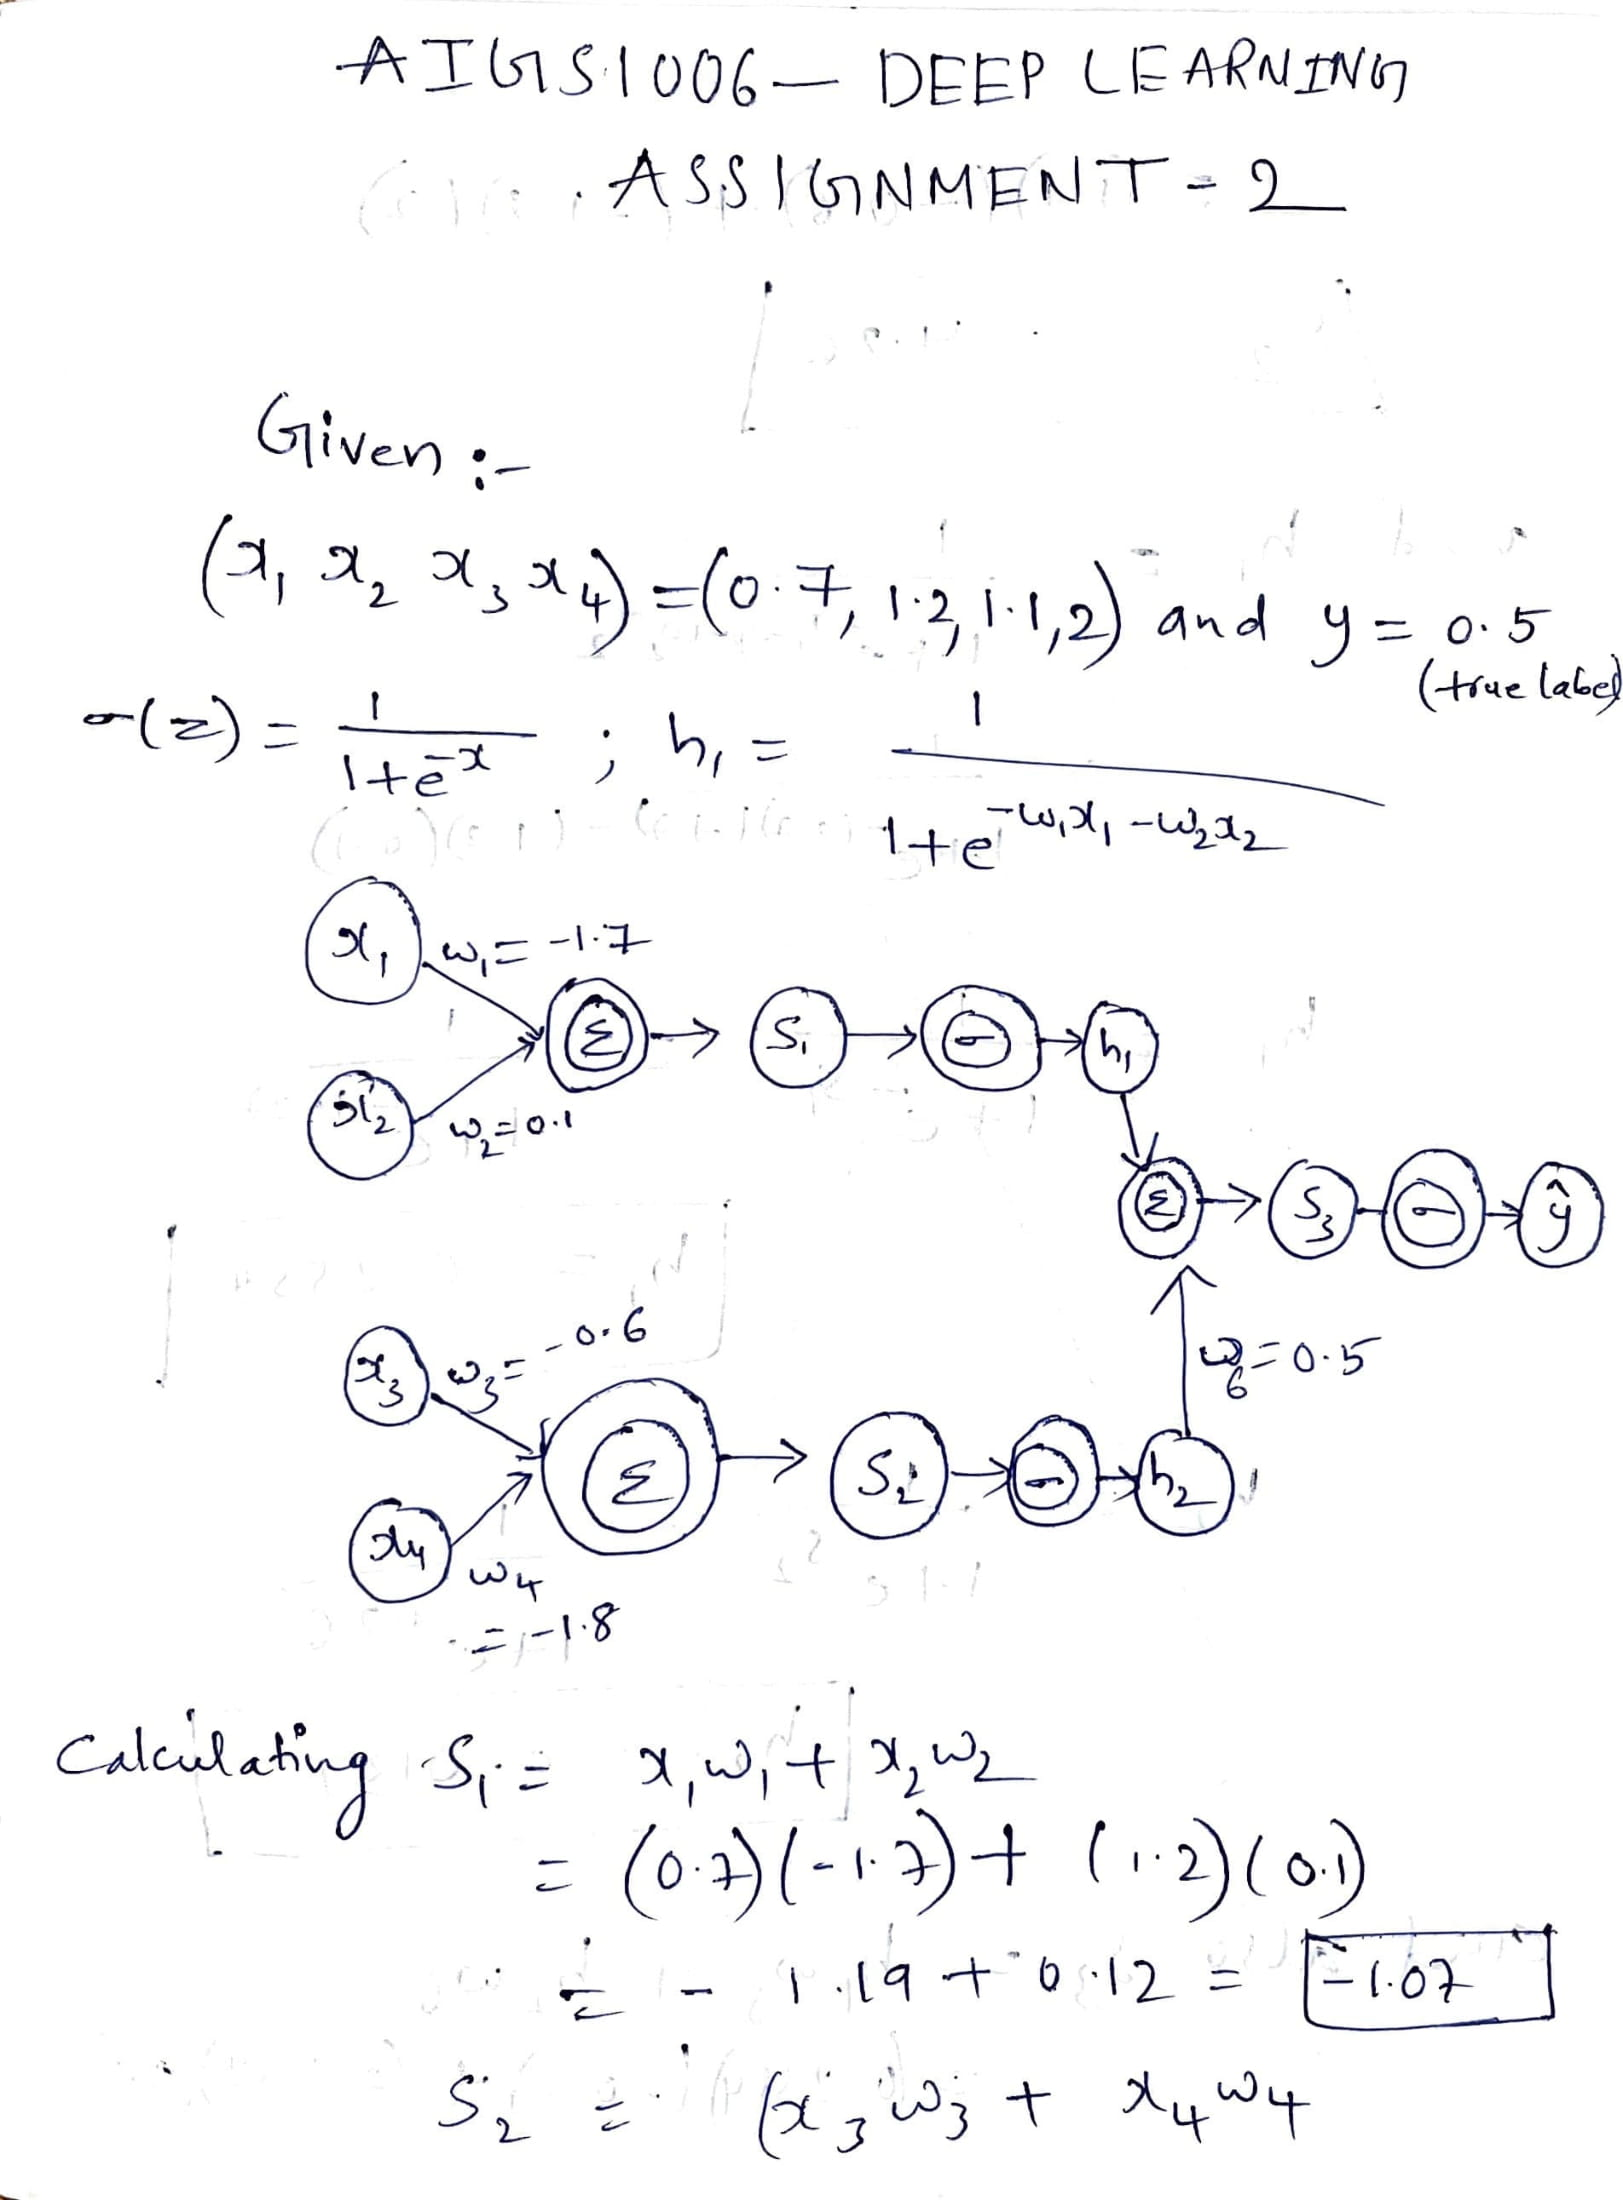

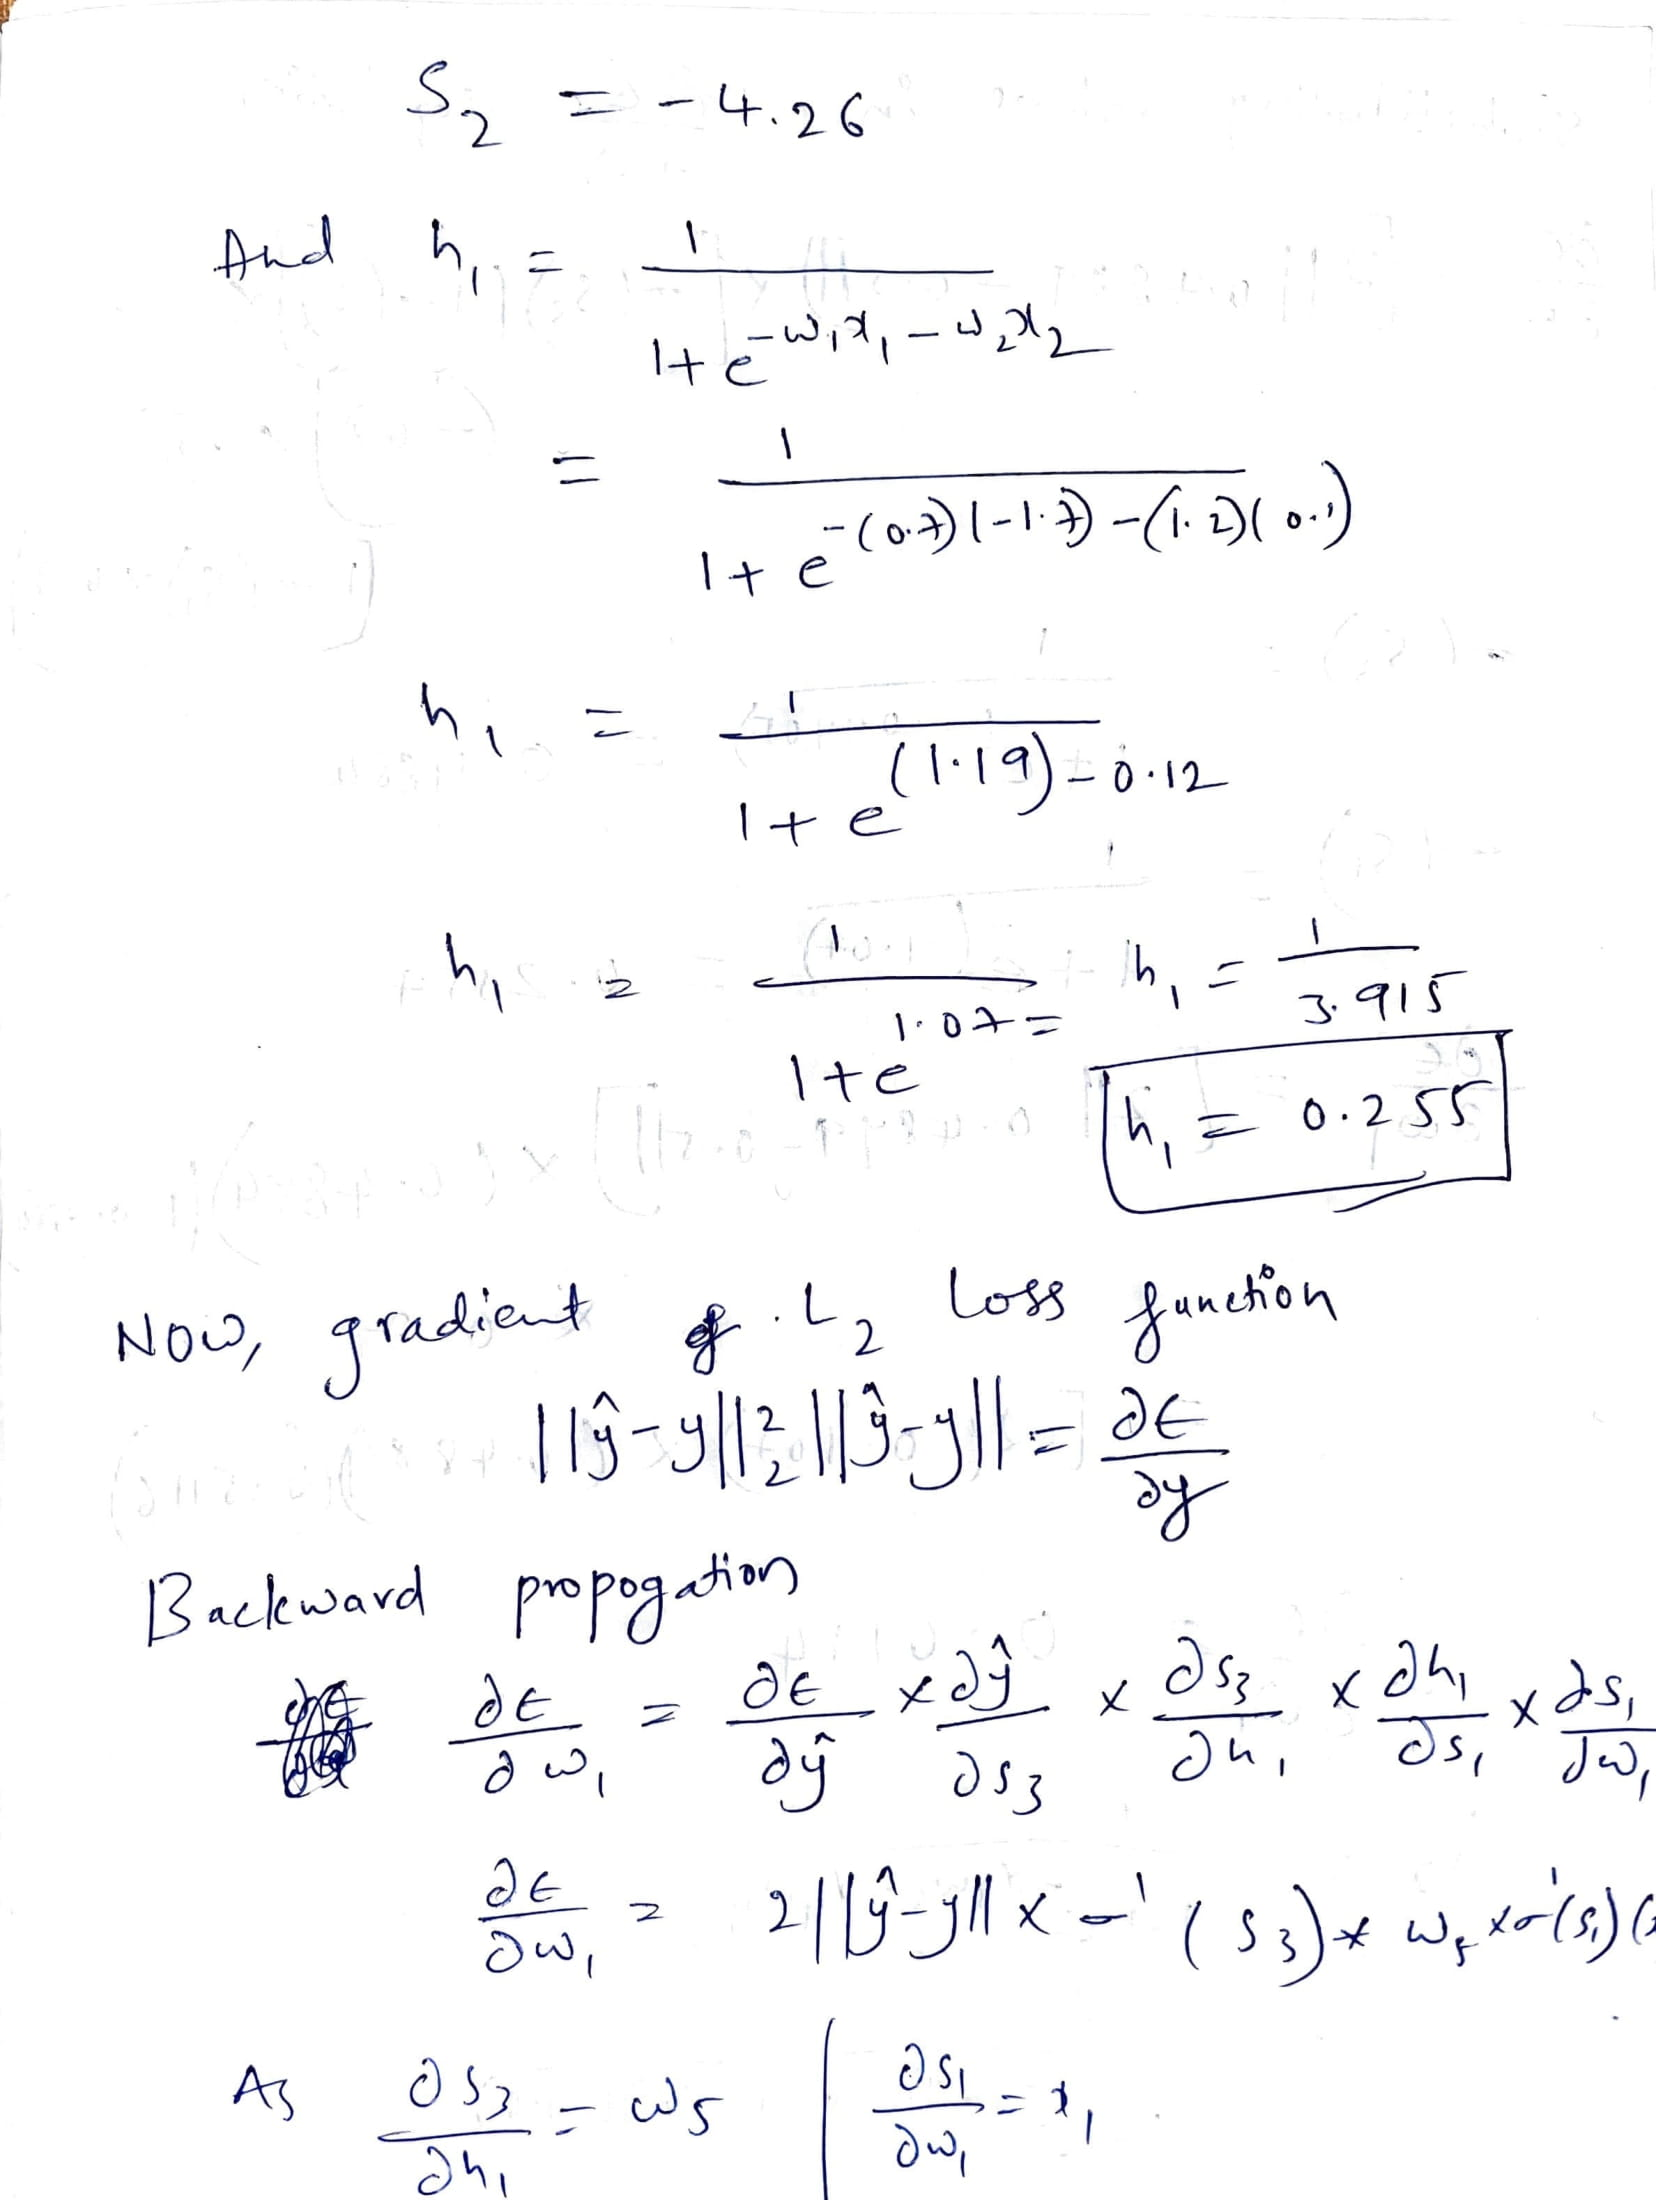

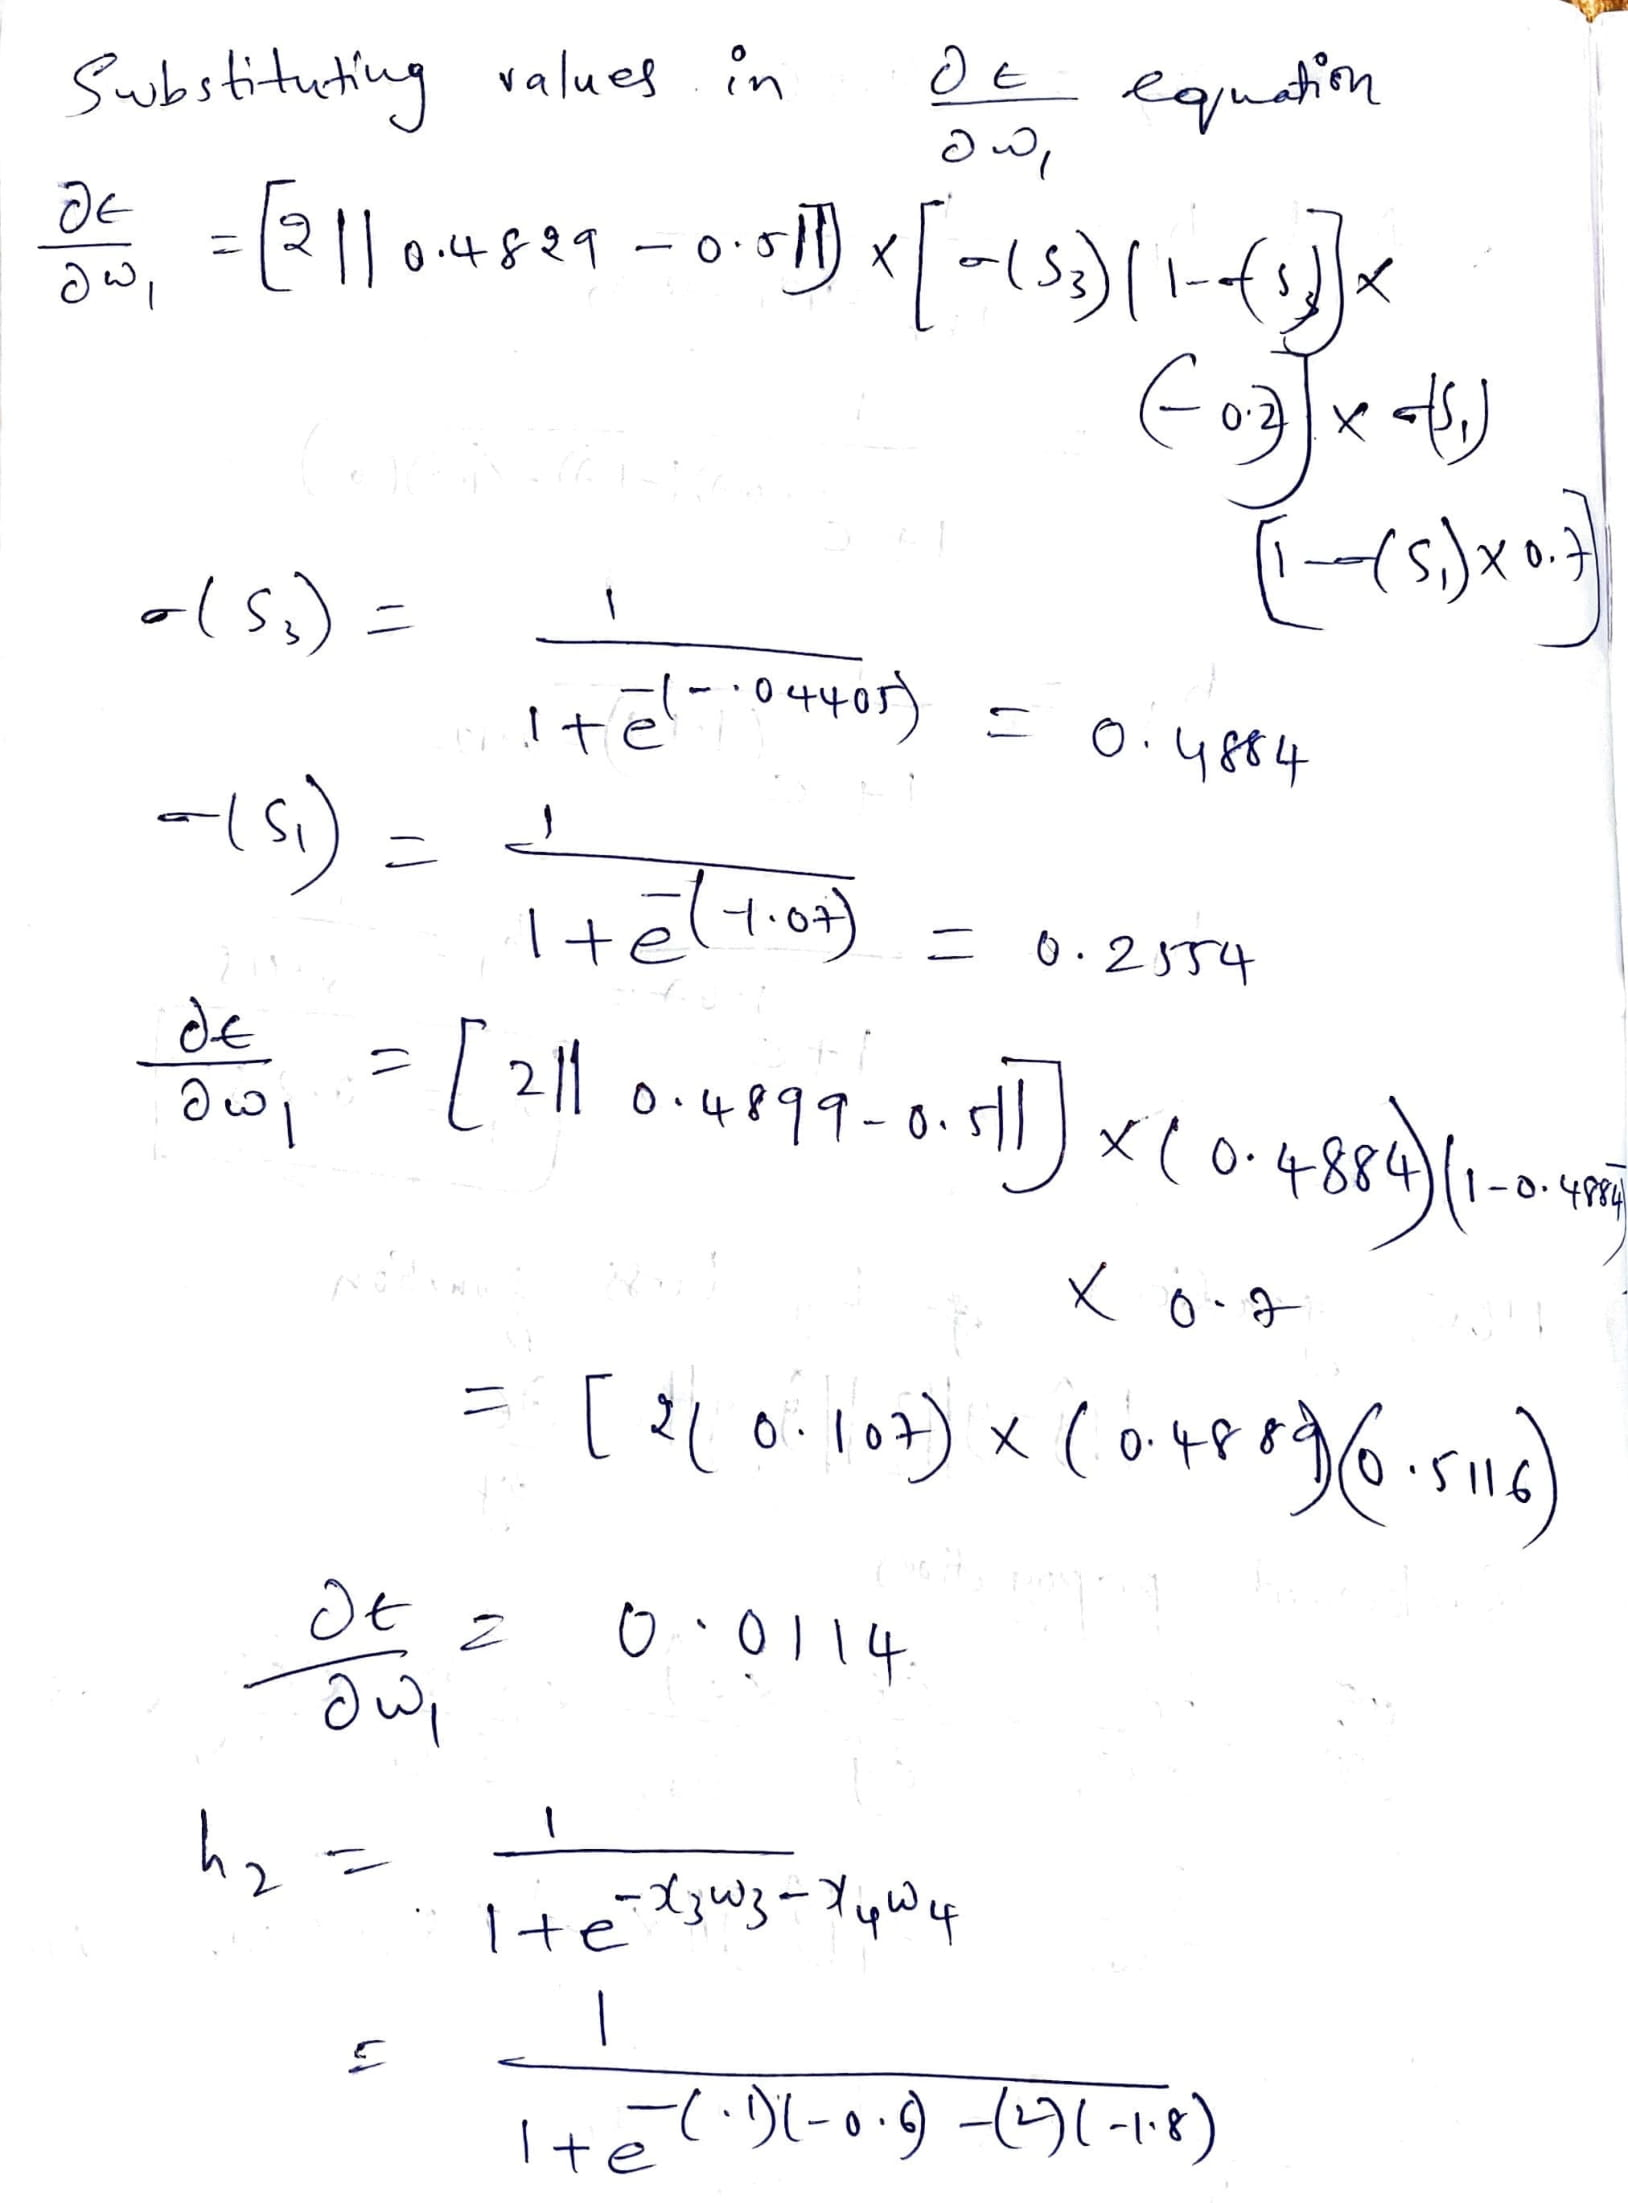

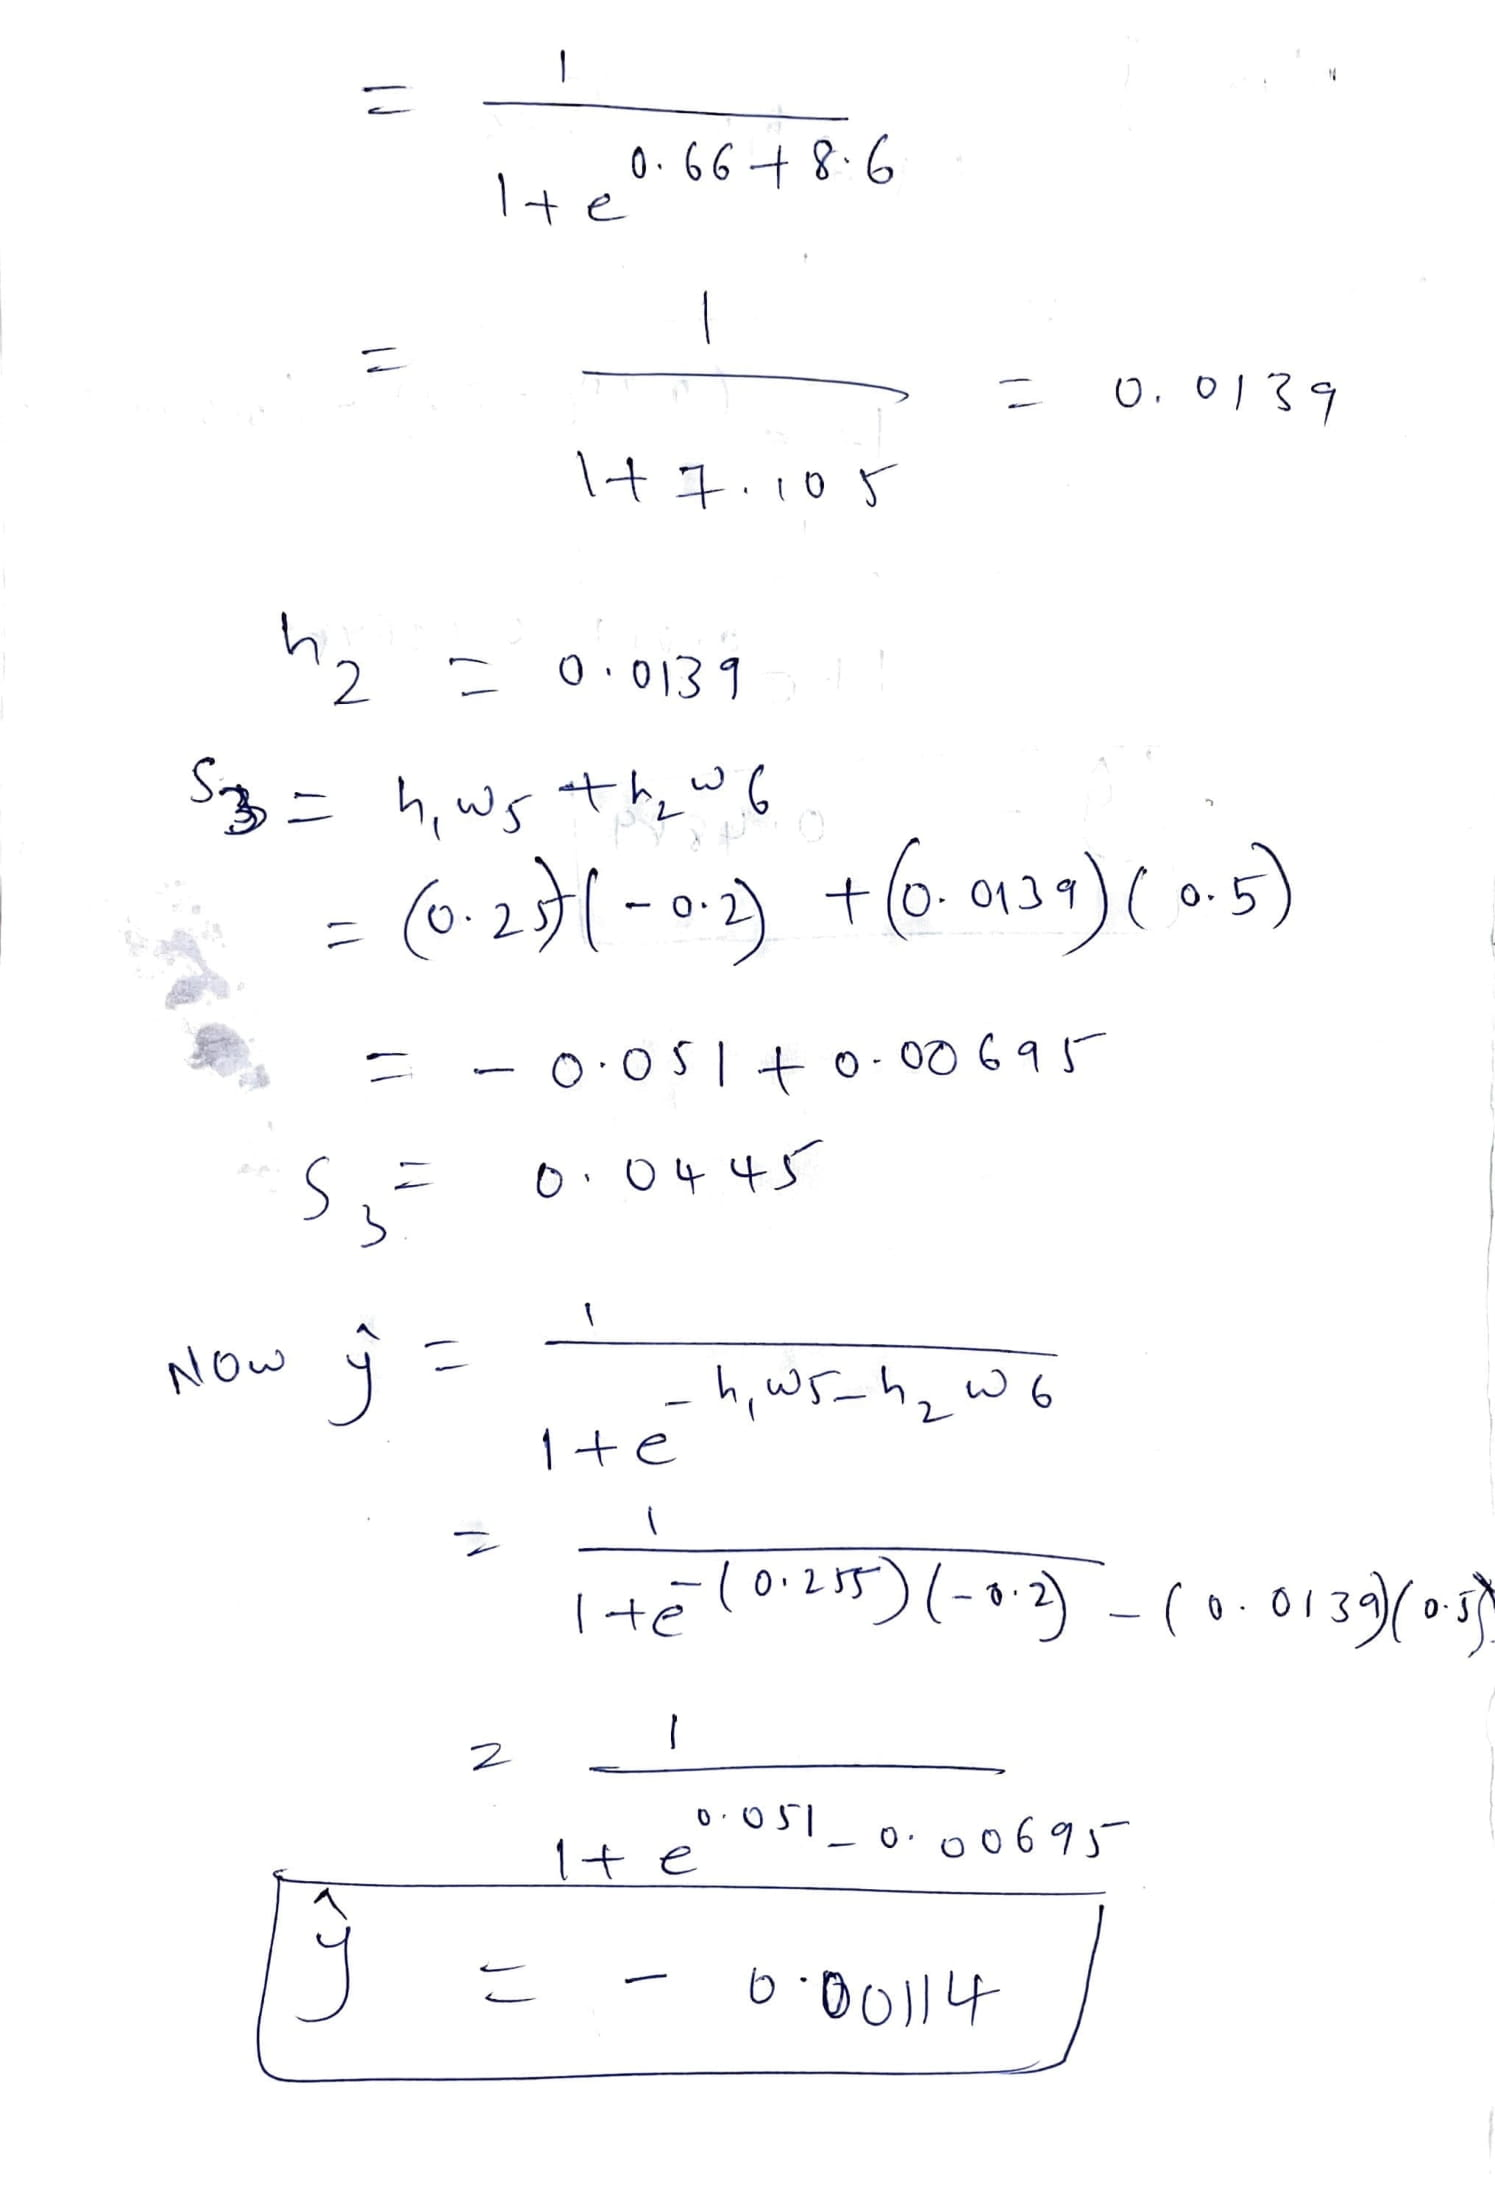

Question 2

(a) State the number of training samples. Also, state the number of test samples.

    There are 8143 training samples and 9752 test samples.

(b) Run a simulation using TensorFlow and vary the number of hidden units and make a plot.

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

datatest = pd.read_csv("testdata.txt")
datatraining = pd.read_csv("trainData.txt")

x = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y = datatraining['Occupancy']

#splitting the training data to training set & valildatio set
X_train, X_validation, y_train, y_validation = train_test_split(x, y) 

x_test = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest['Occupancy']

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


(6107, 5)
(6107,)
(2036, 5)
(2036,)
(9752, 5)
(9752,)


In [8]:
#Model 1 - Hidden layer 1 and hidden units 16
#A good rule of thumb for epoch value that is 3 times the number of columns in your data
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=5))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/15
191/191 [==============================] - 11s 23ms/step - loss: 3.4507 - accuracy: 0.8431 - val_loss: 0.0763 - val_accuracy: 0.9784
Epoch 2/15
191/191 [==============================] - 3s 16ms/step - loss: 0.2335 - accuracy: 0.9476 - val_loss: 0.1784 - val_accuracy: 0.9474
Epoch 3/15
191/191 [==============================] - 3s 18ms/step - loss: 0.2141 - accuracy: 0.9519 - val_loss: 0.1557 - val_accuracy: 0.9651
Epoch 4/15
191/191 [==============================] - 4s 19ms/step - loss: 0.2065 - accuracy: 0.9528 - val_loss: 0.0726 - val_accuracy: 0.9843
Epoch 5/15
191/191 [==============================] - 3s 16ms/step - loss: 0.1982 - accuracy: 0.9551 - val_loss: 0.0925 - val_accuracy: 0.9759
Epoch 6/15
191/191 [==============================] - 3s 15ms/step - loss: 0.1740 - accuracy: 0.9569 - val_loss: 0.0766 - val_accuracy: 0.9735
Epoch 7/15
191/191 [==============================] - 3s 15ms/step - loss: 0.1679 - accuracy: 0.9605 - val_loss: 0.0650 - val_accuracy: 0.982

In [9]:
# varied the hidden units from 16 to 8 , a value very less than the input units
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=5))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))



Epoch 1/15
191/191 [==============================] - 12s 23ms/step - loss: 0.7002 - accuracy: 0.9119 - val_loss: 0.2008 - val_accuracy: 0.9244
Epoch 2/15
191/191 [==============================] - 3s 15ms/step - loss: 0.1218 - accuracy: 0.9420 - val_loss: 0.1016 - val_accuracy: 0.9489
Epoch 3/15
191/191 [==============================] - 4s 20ms/step - loss: 0.1105 - accuracy: 0.9473 - val_loss: 0.0969 - val_accuracy: 0.9637
Epoch 4/15
191/191 [==============================] - 4s 19ms/step - loss: 0.1027 - accuracy: 0.9587 - val_loss: 0.0709 - val_accuracy: 0.9750
Epoch 5/15
191/191 [==============================] - 4s 21ms/step - loss: 0.0934 - accuracy: 0.9651 - val_loss: 0.0666 - val_accuracy: 0.9808
Epoch 6/15
191/191 [==============================] - 3s 15ms/step - loss: 0.0914 - accuracy: 0.9646 - val_loss: 0.0711 - val_accuracy: 0.9710
Epoch 7/15
191/191 [==============================] - 3s 17ms/step - loss: 0.0868 - accuracy: 0.9673 - val_loss: 0.0645 - val_accuracy: 0.978

In [10]:
# varied the hidden units from 52 to 8, a value higher than the input unit
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=5))
model3.add(Dense(52, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))



Epoch 1/15
191/191 [==============================] - 8s 21ms/step - loss: 1.3630 - accuracy: 0.8931 - val_loss: 0.1571 - val_accuracy: 0.9465
Epoch 2/15
191/191 [==============================] - 4s 23ms/step - loss: 0.5219 - accuracy: 0.9317 - val_loss: 1.0303 - val_accuracy: 0.9239
Epoch 3/15
191/191 [==============================] - 2s 13ms/step - loss: 0.4855 - accuracy: 0.9415 - val_loss: 0.1027 - val_accuracy: 0.9774
Epoch 4/15
191/191 [==============================] - 2s 12ms/step - loss: 0.4282 - accuracy: 0.9468 - val_loss: 0.0762 - val_accuracy: 0.9789
Epoch 5/15
191/191 [==============================] - 2s 13ms/step - loss: 0.3964 - accuracy: 0.9512 - val_loss: 0.1736 - val_accuracy: 0.9695
Epoch 6/15
191/191 [==============================] - 2s 13ms/step - loss: 0.3526 - accuracy: 0.9509 - val_loss: 0.1635 - val_accuracy: 0.9740
Epoch 7/15
191/191 [==============================] - 3s 17ms/step - loss: 0.4020 - accuracy: 0.9527 - val_loss: 0.5469 - val_accuracy: 0.9519

In [16]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss Model 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss Model 1', line = dict(color='royalblue', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss Model 2', line=dict(color='firebrick')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss Model 2', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with Model 3', line=dict(color='rgb(0, 255, 0)')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with Model 3', line = dict(color='rgb(0, 255, 0)', dash='dot')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)


305/305 [==============================] - 4s 11ms/step - loss: 1.0316 - accuracy: 0.8139
Accuracy for model 1 on test data: 81.39%
305/305 [==============================] - 4s 12ms/step - loss: 0.4626 - accuracy: 0.9643
Accuracy for model 2 on test data: 96.43%
305/305 [==============================] - 5s 14ms/step - loss: 0.3249 - accuracy: 0.9527
Accuracy for model 3 on test data: 95.27%


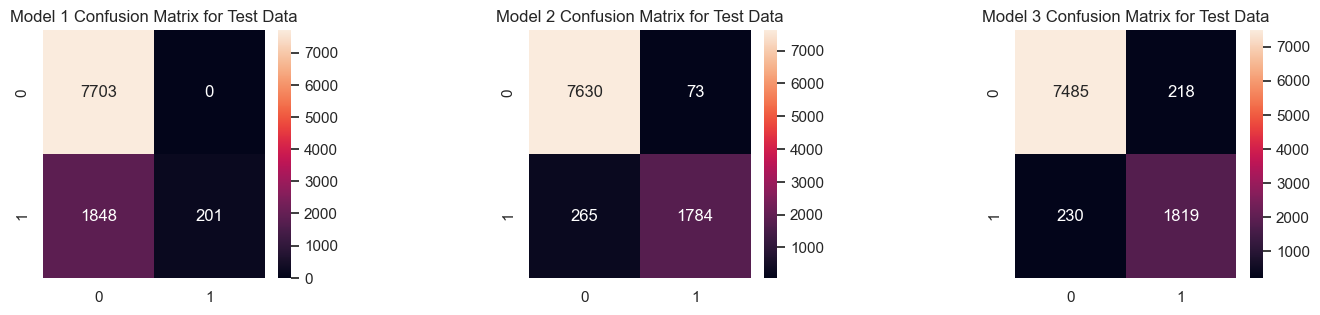

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

y_pred = model1.predict(x_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
ax1.title.set_text("Model 1 Confusion Matrix for Test Data")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",ax=ax1)
print("Accuracy for model 1 on test data: {}%".format(round((model1.evaluate(x_test, y_test)[1]*100),2)))

y_pred = model2.predict(x_test)
y_pred = [1 if i >= threshold else 0 for i in y_pred]
ax2.title.set_text("Model 2 Confusion Matrix for Test Data")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",ax=ax2)
print("Accuracy for model 2 on test data: {}%".format(round((model2.evaluate(x_test, y_test)[1]*100),2)))

y_pred = model3.predict(x_test)
y_pred = [1 if i >= threshold else 0 for i in y_pred]
ax3.title.set_text("Model 3 Confusion Matrix for Test Data")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",ax=ax3)
print("Accuracy for model 3 on test data: {}%".format(round((model3.evaluate(x_test, y_test)[1]*100),2)))

fig.tight_layout()
fig.set_size_inches(15, 3, forward=True)
plt.show()

(c) Discuss (interpret) the results.

    Model 2 with 8 hidden units has an test accuracy of 96.43% , compartively 95.2% of model 3 with hidden units 52. Lowest 81.39% of model1 with hidden units 16.

(d) Add a second hidden layer, and train a few architectures with 2 hidden layers. Report what architectures you tried

    5-(h1)52-(h2)36-1
    5-(h1)5-(h2)8-1
    5-(h1)1000-(h2)500-1

In [56]:
#5-(h1)52-(h2)36-1
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=5))
model4.add(Dense(52, activation='relu'))
model4.add(Dense(36, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/15
191/191 [==============================] - 4s 23ms/step - loss: 0.2450 - accuracy: 0.9640 - val_loss: 0.0991 - val_accuracy: 0.9887
Epoch 2/15
191/191 [==============================] - 4s 22ms/step - loss: 0.2260 - accuracy: 0.9692 - val_loss: 0.1248 - val_accuracy: 0.9828
Epoch 3/15
191/191 [==============================] - 4s 22ms/step - loss: 0.2174 - accuracy: 0.9686 - val_loss: 0.5059 - val_accuracy: 0.8821
Epoch 4/15
191/191 [==============================] - 5s 24ms/step - loss: 0.2049 - accuracy: 0.9697 - val_loss: 0.1250 - val_accuracy: 0.9853
Epoch 5/15
191/191 [==============================] - 6s 30ms/step - loss: 0.2012 - accuracy: 0.9712 - val_loss: 0.1043 - val_accuracy: 0.9804
Epoch 6/15
191/191 [==============================] - 7s 35ms/step - loss: 0.1889 - accuracy: 0.9684 - val_loss: 0.1451 - val_accuracy: 0.9833
Epoch 7/15
191/191 [==============================] - 4s 22ms/step - loss: 0.1931 - accuracy: 0.9671 - val_loss: 0.2105 - val_accuracy: 0.9759

In [59]:
#5-(h1)5-(h2)8-1
model5 = Sequential()
model5.add(Dense(32, activation='relu', input_dim=5))
model5.add(Dropout(0.2))
model5.add(Dense(5, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/15
191/191 [==============================] - 15s 34ms/step - loss: 1.8686 - accuracy: 0.6802 - val_loss: 0.5957 - val_accuracy: 0.7765
Epoch 2/15
191/191 [==============================] - 4s 20ms/step - loss: 0.3980 - accuracy: 0.8425 - val_loss: 0.1126 - val_accuracy: 0.9416
Epoch 3/15
191/191 [==============================] - 5s 24ms/step - loss: 0.1908 - accuracy: 0.9227 - val_loss: 0.1083 - val_accuracy: 0.9391
Epoch 4/15
191/191 [==============================] - 6s 30ms/step - loss: 0.1313 - accuracy: 0.9370 - val_loss: 0.1074 - val_accuracy: 0.9445
Epoch 5/15
191/191 [==============================] - 5s 27ms/step - loss: 0.1199 - accuracy: 0.9430 - val_loss: 0.0965 - val_accuracy: 0.9440
Epoch 6/15
191/191 [==============================] - 3s 18ms/step - loss: 0.1076 - accuracy: 0.9507 - val_loss: 0.0867 - val_accuracy: 0.9538
Epoch 7/15
191/191 [==============================] - 4s 19ms/step - loss: 0.0972 - accuracy: 0.9568 - val_loss: 0.0717 - val_accuracy: 0.973

In [60]:
#5-(h1)1000-(h2)500-1
model6 = Sequential()
model6.add(Dense(32, activation='relu', input_dim=5, kernel_regularizer=l1(l=0.01)))
model6.add(Dense(1000, activation='relu', kernel_regularizer=l1(l=0.01)))
model6.add(Dense(500, activation='relu', kernel_regularizer=l1(l=0.01)))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/15
191/191 [==============================] - 19s 70ms/step - loss: 37.2811 - accuracy: 0.8788 - val_loss: 5.4463 - val_accuracy: 0.8625
Epoch 2/15
191/191 [==============================] - 11s 59ms/step - loss: 3.4048 - accuracy: 0.9298 - val_loss: 2.9537 - val_accuracy: 0.9533
Epoch 3/15
191/191 [==============================] - 12s 65ms/step - loss: 2.9165 - accuracy: 0.9555 - val_loss: 2.8689 - val_accuracy: 0.9597
Epoch 4/15
191/191 [==============================] - 13s 67ms/step - loss: 2.8174 - accuracy: 0.9745 - val_loss: 2.8382 - val_accuracy: 0.9479
Epoch 5/15
191/191 [==============================] - 12s 64ms/step - loss: 2.7985 - accuracy: 0.9746 - val_loss: 2.7851 - val_accuracy: 0.9808
Epoch 6/15
191/191 [==============================] - 12s 62ms/step - loss: 2.7770 - accuracy: 0.9784 - val_loss: 2.7275 - val_accuracy: 0.9872
Epoch 7/15
191/191 [==============================] - 12s 64ms/step - loss: 2.7575 - accuracy: 0.9799 - val_loss: 2.8556 - val_accuracy